In [1]:
import numpy as np
import time
from PySDM import Formulae
from PySDM.physics.constants import si
from PySDM.backends import CPU
from PySDM_examples.Luettmer_homogeneous_freezing.simulation import Simulation
from PySDM_examples.Luettmer_homogeneous_freezing.settings import Settings
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot


In [2]:
"""  basic setup for homogeneous freezing of pure-liquid droplets """

formulae = Formulae(
    particle_shape_and_density="MixedPhaseSpheres",
)

def run_simulations(setting):

        simulation = { "settings": setting,
                       "ensemble_member_outputs": [],
                       }
        for n in range(setting["number_of_ensemble_runs"]):
            model_setup = Settings(**simulation["settings"])
            model_setup.formulae.seed += 1
            model = Simulation(model_setup)
            simulation["ensemble_member_outputs"].append( model.run() )

        return simulation

standard = { "n_sd": int(1e3),
    "w_updraft": 1. * si.meter / si.second,
    "T0": formulae.trivia.C2K(-25),
    "dz": 0.1 * si.meter,
    "N_dv_droplet_distribution":  5000 / si.cm**3,
    "r_mean_droplet_distribution": 15 * si.nanometer,
    "type_droplet_distribution": "monodisperse",
    "RH_0": 0.995,
    "p0": 500 * si.hectopascals,
    "condensation_enable": True,
    "deposition_enable": True,
    "deposition_adaptive": True,
    "number_of_ensemble_runs": 1,
            }

backends = {
   "threshold": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Null",
        saturation_vapour_pressure="MurphyKoop2005",
        seed=time.time_ns(),
    )),
    "KoopMurray2016": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="KoopMurray2016",
        saturation_vapour_pressure="MurphyKoop2005",
        seed=time.time_ns(),
    )),
   "Koop_Correction": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Koop_Correction",
        saturation_vapour_pressure="MurphyKoop2005",
        seed=time.time_ns(),
    )),
    "Koop2000": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Koop2000",
        saturation_vapour_pressure="MurphyKoop2005",
        seed=time.time_ns(),
    )),
}
hom_freezing_types = [  "KoopMurray2016", "Koop_Correction" ]
hom_freezing_types_all = [  "KoopMurray2016", "Koop_Correction", "Koop2000"  ]

vertical_updrafts = np.geomspace(0.2,10,num=9) * si.meter / si.second

Setting up simulation for KoopMurray2016 with wpdraft=10.0 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated


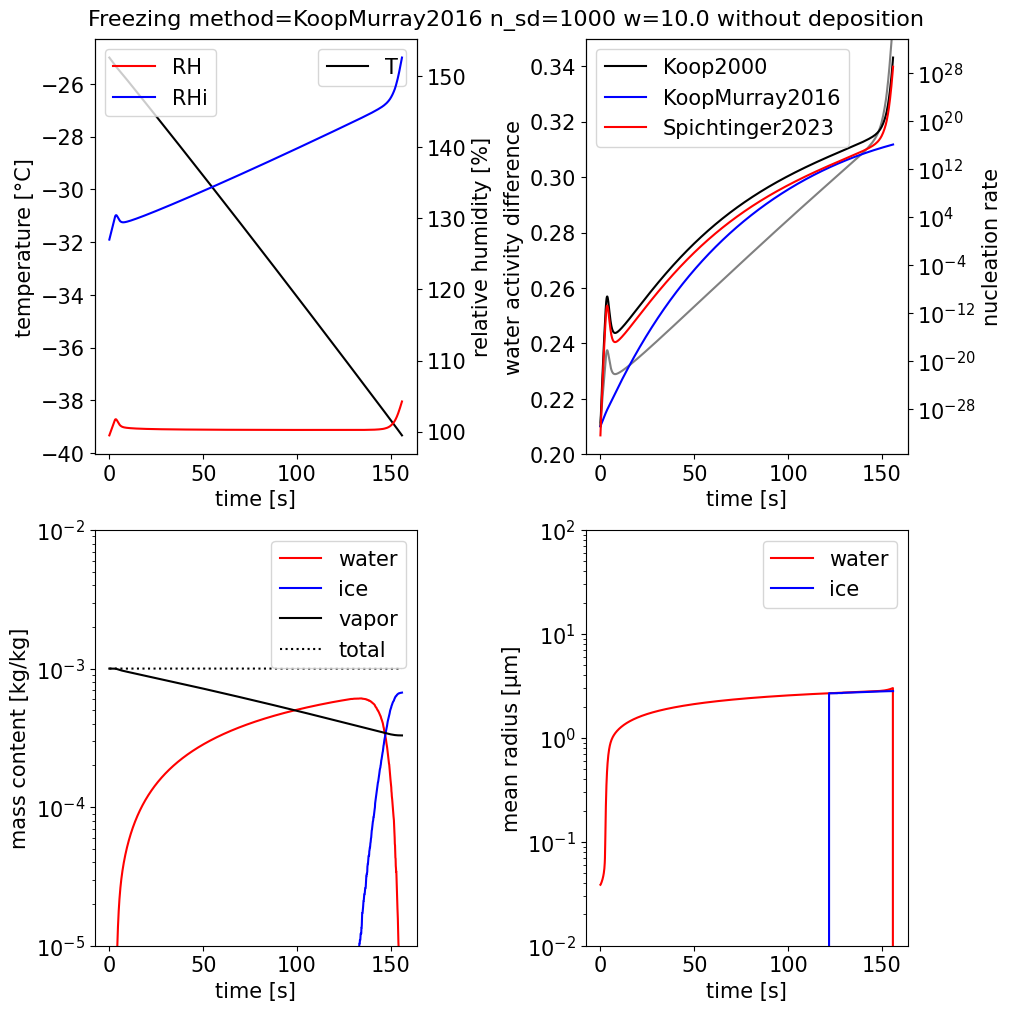

In [4]:
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": vertical_updrafts[-1],
            "deposition_enable": False,
            "n_output": 1
            }
threshold_reference_high_w_simulation = run_simulations(setting_dict)
plot.plot_thermodynamics_and_bulk(threshold_reference_high_w_simulation, " without deposition")

Setting up simulation for KoopMurray2016 with wpdraft=0.2 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated


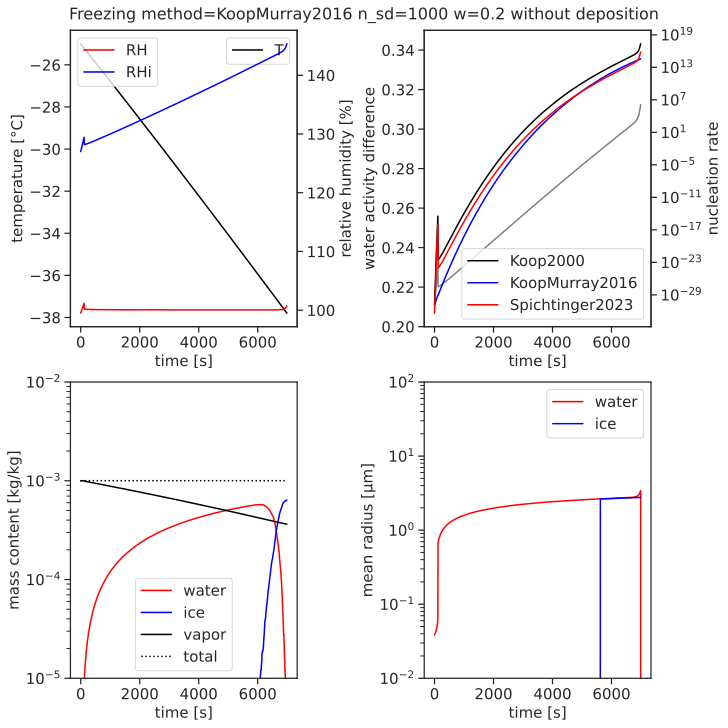

In [27]:
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 0.2,
            "deposition_enable": False,
            "n_output": 1,
            "dz": 0.1,
            }
threshold_reference_low_w_simulation = run_simulations(setting_dict)
plot.plot_thermodynamics_and_bulk(threshold_reference_low_w_simulation, " without deposition")

In [6]:
""" Simulations for n_sd ensemble without deposition """
nsd_ensemble_simulations =[]
number_of_nsd = (1e1, 1e2, 1e3)
for hom_freezing_type in hom_freezing_types:
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": False,
            }
        nsd_ensemble_simulations.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10

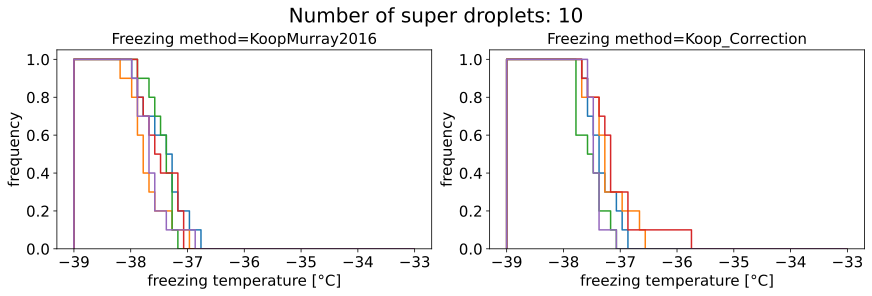

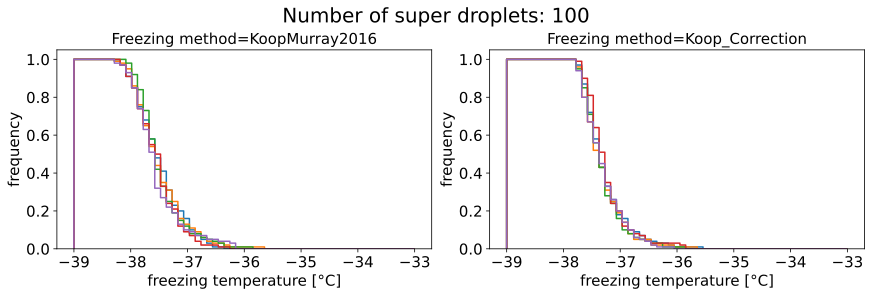

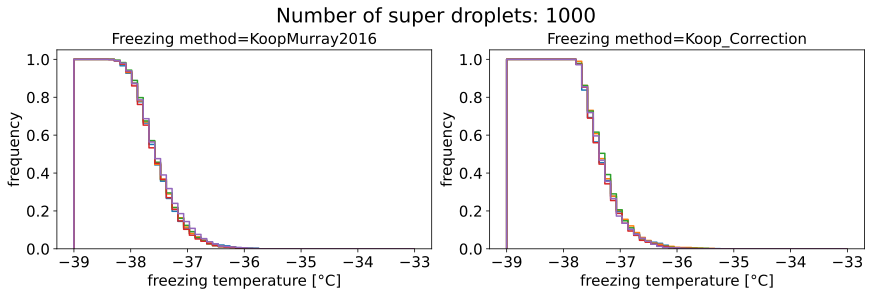

In [17]:
""" Plots for n_sd ensemble without deposition """
for n_sd in number_of_nsd:
    fig, axs = pyplot.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
    fig.suptitle("Number of super droplets: {}".format(int(n_sd)),fontsize=20)
    axs = axs.ravel()
    i = 0
    for simulation in nsd_ensemble_simulations:
        if simulation["settings"]["n_sd"] == n_sd and simulation["settings"]["w_updraft"] == standard["w_updraft"]:
            axs[i] = plot.plot_freezing_temperatures_histogram(axs[i], simulation)
            i += 1
    show_plot()

In [23]:
""" Updraft ensemble simulations without deposition  """
simulations_ensemble_no_deposition = []

for hom_freezing_type in hom_freezing_types:
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard,
            "w_updraft": updraft  * si.meter / si.second,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "deposition_enable": False,
            }
        simulations_ensemble_no_deposition.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=0.2 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.32613788179066194 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.5318295896944989 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.8672488792828036 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.4142135623730951 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=2.306143078159937 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles froz

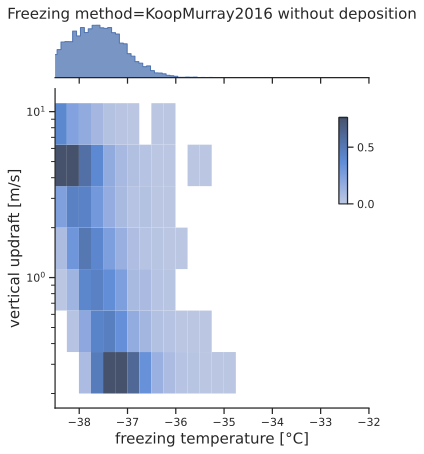

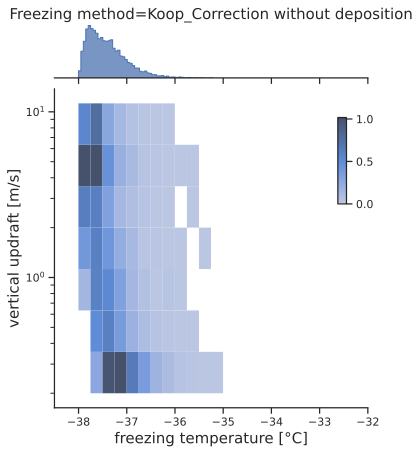

In [26]:
""" Plot ensemble simulations without deposition  """
reload(plot)
for hom_freezing_type in hom_freezing_types:

    histogram_data_dict = {}

    histogram_data_dict["hom_freezing_type"] = hom_freezing_type
    histogram_data_dict["T_frz_histogram_list"] = []
    histogram_data_dict["w_updraft_histogram_list"] = []

    for i, updraft in enumerate(vertical_updrafts):
        for simulation in simulations_ensemble_no_deposition:
            if (simulation["settings"]["w_updraft"] == updraft
                    and simulation["settings"]["hom_freezing"] == hom_freezing_type):
                output = simulation["ensemble_member_outputs"][0]
                T_frz = output["T_frz"][-1]
                histogram_data_dict["T_frz_histogram_list"].extend( T_frz )
                histogram_data_dict["w_updraft_histogram_list"].extend( np.full_like(T_frz, updraft) )

    plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_dict, title_add = " without deposition")
    show_plot()

In [5]:
""" Simulations for n_sd ensemble with deposition """
nsd_ensemble_deposition_simulations =[]
number_of_nsd = (1e2, 1e3, 1e4)
for hom_freezing_type in hom_freezing_types:
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": True,
            }
        nsd_ensemble_deposition_simulations.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=4999999999.999999


KeyboardInterrupt: 

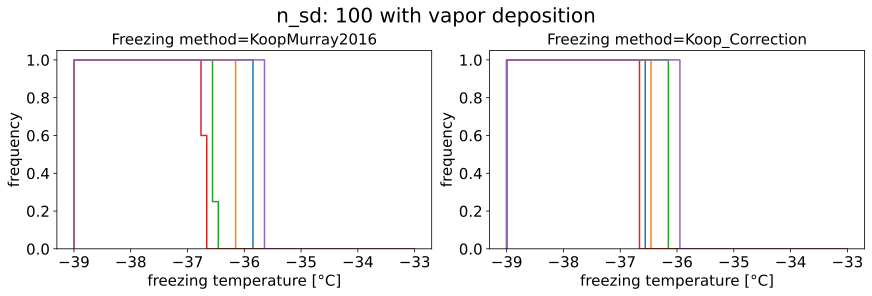

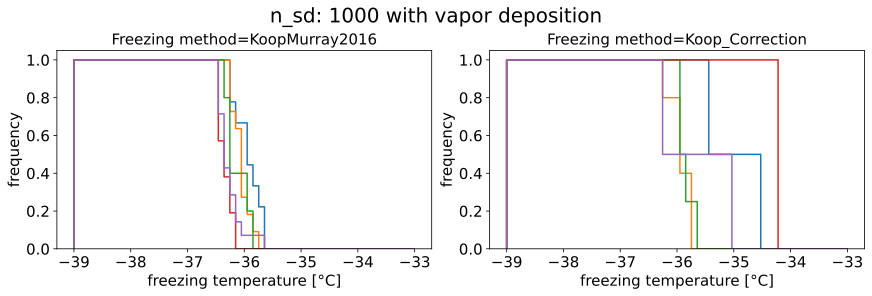

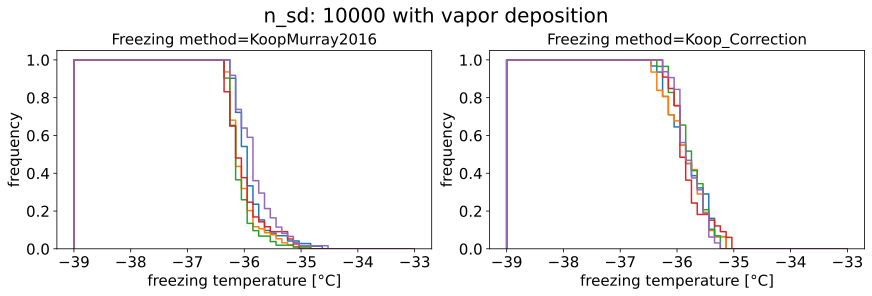

In [4]:
for n_sd in number_of_nsd:
    fig, axs = pyplot.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
    fig.suptitle("n_sd: {} with vapor deposition".format(int(n_sd)),fontsize=20)
    axs = axs.ravel()
    i = 0
    for simulation in nsd_ensemble_deposition_simulations:
        if simulation["settings"]["n_sd"] == n_sd and simulation["settings"]["w_updraft"] == standard["w_updraft"]:
            axs[i] = plot.plot_freezing_temperatures_histogram(axs[i], simulation)
            i += 1
    show_plot()

In [3]:
""" Simulations for updraft histogram with deposition """
simulations_updraft_ensemble = []

for hom_freezing_type in hom_freezing_types:
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard,
            "w_updraft": updraft  * si.meter / si.second,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 1,
            }

        simulations_updraft_ensemble.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=0.2 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.32613788179066194 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.5318295896944989 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.8672488792828036 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.4142135623730951 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=2.306143078159937 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particle

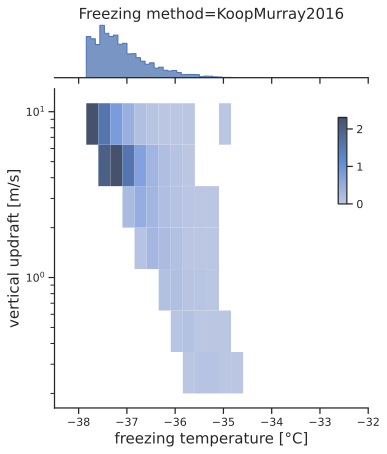

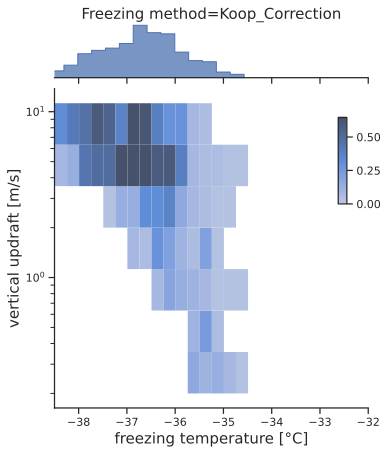

In [6]:

for hom_freezing_type in hom_freezing_types:

    histogram_data_dict = {}

    histogram_data_dict["hom_freezing_type"] = hom_freezing_type
    histogram_data_dict["T_frz_histogram_list"] = []
    histogram_data_dict["w_updraft_histogram_list"] = []

    for i, updraft in enumerate(vertical_updrafts):
        for simulation in simulations_updraft_ensemble:
            if (simulation["settings"]["w_updraft"] == updraft
                    and simulation["settings"]["hom_freezing"] == hom_freezing_type):
                output = simulation["ensemble_member_outputs"][0]
                T_frz = output["T_frz"][-1]
                histogram_data_dict["T_frz_histogram_list"].extend( T_frz )
                histogram_data_dict["w_updraft_histogram_list"].extend( np.full_like(T_frz, updraft) )

    plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_dict)
    show_plot() # Does need to be inside the plot function?

In [ ]:
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": vertical_updrafts[-1],
            "deposition_enable": True,
            "n_output": 1,
             "n_sd": int(1e4),
            }
reference_high_w_dep_KoopMurray2016_simulation = run_simulations(setting_dict)

setting_dict = {
            **standard,
            "backend": backends["Koop_Correction"],
            "hom_freezing": "Koop_Correction",
            "w_updraft": vertical_updrafts[-1],
            "deposition_enable": True,
            "n_output": 1,
             "n_sd": int(1e4),
            }
reference_high_w_dep_Koop_Correction_simulation = run_simulations(setting_dict)

Setting up simulation for KoopMurray2016 with wpdraft=10.0 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for Koop_Correction with wpdraft=10.0 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...


In [5]:
""" Simulations for CCN concentration histogram  """
simulations_ccn_concentration_ensemble = []
number_concentrations = np.geomspace(100,20000,num=10) / si.cm**3

for hom_freezing_type in hom_freezing_types:
    for n_dv in number_concentrations:
        setting_dict = {
            **standard,
            "n_sd": int(1e4),
            "N_dv_droplet_distribution":  n_dv,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            }
        simulations_ccn_concentration_ensemble.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=99999999.99999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=180164823.06544116
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=324593634.7020169
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=584803547.6425728
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=1053610276.8906642
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=1898235091.1593704
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpd

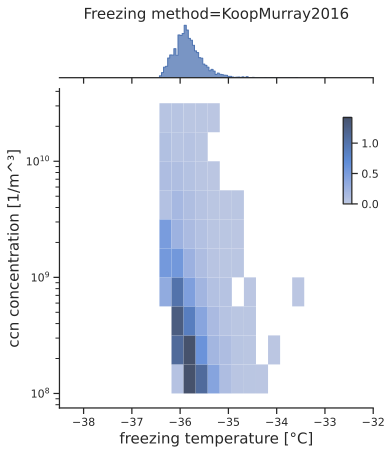

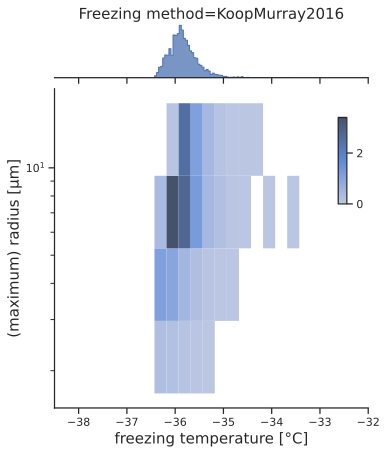

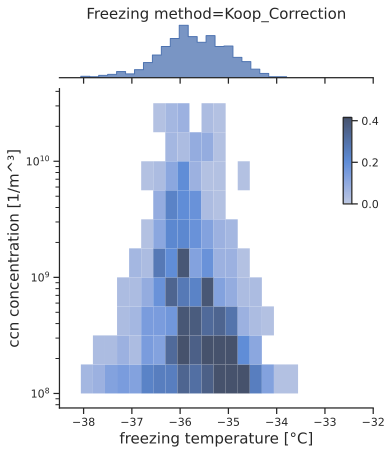

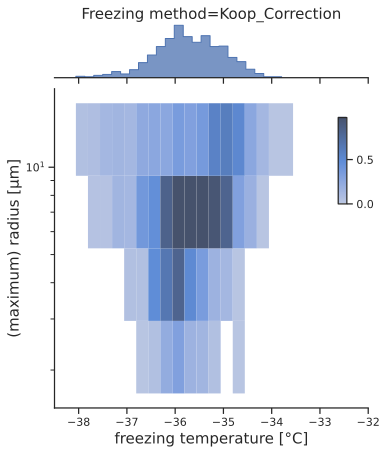

In [8]:

for hom_freezing_type in hom_freezing_types:

    histogram_data_ccn_concentration_ensemble = {}
    histogram_data_ccn_concentration_ensemble["hom_freezing_type"] = hom_freezing_type

    histogram_data_ccn_concentration_ensemble["T_frz_histogram_list"] = []
    histogram_data_ccn_concentration_ensemble["n_ccn_histogram_list"] = []
    histogram_data_ccn_concentration_ensemble["rc_max_histogram_list"] = []

    for n_ccn in number_concentrations:
        for simulation in simulations_ccn_concentration_ensemble:
            if (simulation["settings"]["hom_freezing"] == hom_freezing_type
                    and simulation["settings"]["N_dv_droplet_distribution"] == n_ccn):
                output = simulation["ensemble_member_outputs"][0]
                T_frz = np.asarray(output["T_frz"][-1])
                rc = np.asarray(output["rs"])
                histogram_data_ccn_concentration_ensemble["T_frz_histogram_list"].extend( T_frz )
                histogram_data_ccn_concentration_ensemble["n_ccn_histogram_list"].extend( np.full_like(T_frz, n_ccn) )
                histogram_data_ccn_concentration_ensemble["rc_max_histogram_list"].extend( np.full_like(T_frz, np.amax(rc)) )

    plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_ccn_concentration_ensemble)
    del histogram_data_ccn_concentration_ensemble["n_ccn_histogram_list"]
    plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_ccn_concentration_ensemble)
    show_plot() # Does need to be inside the plot function?